# Picky file parsing example

In [8]:
from probe import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Single file 

In [20]:
# set input 
input_file = './test-files/input-example-1.picky'
source_index = 1

In [32]:
%%time
# parse single file 
df = parse_picky_new(input_file, source_index)
print(df.shape)
df.head()

(1250, 13)
CPU times: user 3.24 s, sys: 16.7 ms, total: 3.26 s
Wall time: 3.26 s


,Annotation,Start,End,TargetSequence,Tm,ReverseComplement,Primer,Primer Tm,Spacer,Padlock,Padlock Tm,DeltaTm,source_index
0,NG_000006.1,26327,26368,CTGGGGTCCTTGAGTCGGACGGGCGTTTGTGCGTCTCCCGGC,91.22,GCCGGGAGACGCACAAACGCCCGTCCGACTCAAGGACCCCAG,GCCGGGAGACGCACAAACG,75.422692,CC,CGTCCGACTCAAGGACCCCAG,75.262572,0.160120,1
1,NG_000006.1,41924,41968,AGTTCCTGAGCCACGTTATCTCGGCGCTGGTTTCCGAGTACCGCT,89.22,AGCGGTACTCGGAAACCAGCGCCGAGATAACGTGGCTCAGGAACT,AGCGGTACTCGGAAACCAGC,73.668260,GC,CGAGATAACGTGGCTCAGGAACT,72.453816,1.214443,1
2,NG_007066.1,4920,4959,ACTTTGCACCAGTCCGAGGGAATTTGCGGTCGGTGACGCG,87.69,CGCGTCACCGACCGCAAATTCCCTCGGACTGGTGCAAAGT,CGCGTCACCGACCGCAAAT,75.143061,T,CCCTCGGACTGGTGCAAAGT,73.865102,1.277960,1
3,NG_007082.2,83837,83877,CTCCGGGGACATTACAAGCTGGTCGCCGTCATATTGGTAGC,83.78,GCTACCAATATGACGGCGACCAGCTTGTAATGTCCCCGGAG,GCTACCAATATGACGGCGAC,69.692239,C,AGCTTGTAATGTCCCCGGAG,71.024630,1.332391,1
4,NG_007082.2,86707,86748,TCCTTCTCCACGGCCTTGTATGGCGAGAGCGACCTGTGAGGC,88.59,GCCTCACAGGTCGCTCTCGCCATACAAGGCCGTGGAGAAGGA,GCCTCACAGGTCGCTCTCG,73.909610,CC,ATACAAGGCCGTGGAGAAGGA,72.335556,1.574054,1


## Multiple file 

In [26]:
# set input
input_path = './test-files/'
files = sorted([ f for f in os.listdir(input_path) if '.picky' in f])
print(files)

['input-example-1.picky', 'input-example-2.picky']


In [31]:
%%time
# setup multiple proessing for parsing the files 
input_file_1 = os.path.join(input_path, files[0])
input_file_2 = os.path.join(input_path, files[1])

p = [(input_file_1, 1), (input_file_2, 2)] # (input_file_path, source_index)
pool = mp.Pool(processes = (mp.cpu_count()))
results = pool.starmap(parse_picky_new, p)
pool.close()
pool.join()

df_combined = pd.concat(results)
print(df_combined.shape)
df_combined.head()

(2500, 13)
CPU times: user 38.8 ms, sys: 104 ms, total: 143 ms
Wall time: 4.36 s


,Annotation,Start,End,TargetSequence,Tm,ReverseComplement,Primer,Primer Tm,Spacer,Padlock,Padlock Tm,DeltaTm,source_index
0,NG_000006.1,26327,26368,CTGGGGTCCTTGAGTCGGACGGGCGTTTGTGCGTCTCCCGGC,91.22,GCCGGGAGACGCACAAACGCCCGTCCGACTCAAGGACCCCAG,GCCGGGAGACGCACAAACG,75.422692,CC,CGTCCGACTCAAGGACCCCAG,75.262572,0.160120,1
1,NG_000006.1,41924,41968,AGTTCCTGAGCCACGTTATCTCGGCGCTGGTTTCCGAGTACCGCT,89.22,AGCGGTACTCGGAAACCAGCGCCGAGATAACGTGGCTCAGGAACT,AGCGGTACTCGGAAACCAGC,73.668260,GC,CGAGATAACGTGGCTCAGGAACT,72.453816,1.214443,1
2,NG_007066.1,4920,4959,ACTTTGCACCAGTCCGAGGGAATTTGCGGTCGGTGACGCG,87.69,CGCGTCACCGACCGCAAATTCCCTCGGACTGGTGCAAAGT,CGCGTCACCGACCGCAAAT,75.143061,T,CCCTCGGACTGGTGCAAAGT,73.865102,1.277960,1
3,NG_007082.2,83837,83877,CTCCGGGGACATTACAAGCTGGTCGCCGTCATATTGGTAGC,83.78,GCTACCAATATGACGGCGACCAGCTTGTAATGTCCCCGGAG,GCTACCAATATGACGGCGAC,69.692239,C,AGCTTGTAATGTCCCCGGAG,71.024630,1.332391,1
4,NG_007082.2,86707,86748,TCCTTCTCCACGGCCTTGTATGGCGAGAGCGACCTGTGAGGC,88.59,GCCTCACAGGTCGCTCTCGCCATACAAGGCCGTGGAGAAGGA,GCCTCACAGGTCGCTCTCG,73.909610,CC,ATACAAGGCCGTGGAGAAGGA,72.335556,1.574054,1


## Filtering

In [31]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import Bio.SeqIO

In [53]:
# read parsed files 
input_path = 'Z:/Documents/probe/Human_Intron_Probe/output/'
input_df1 = pd.read_csv(os.path.join(input_path, 'parsed_results.csv'), index_col=0)
input_df1.head()

,Annotation,Start,End,TargetSequence,Tm,ReverseComplement,Primer,Primer Tm,Spacer,Padlock,Padlock Tm,DeltaTm,source_index
0,NG_005895_TSC2_intron_15,74,113,TGTCCTCCTCTTCGAGTGACCGGATGGCTGTGTCCGTAGG,85.18,CCTACGGACACAGCCATCCGGTCACTCGAAGAGGAGGACA,CCTACGGACACAGCCATCC,71.508684,G,GTCACTCGAAGAGGAGGACA,69.851136,1.657548,1
1,NG_005895_TSC2_intron_17,190,229,ATCTGTGGCTTGTCGCTCTAAGCCGCACGGTGACATGGGT,87.71,ACCCATGTCACCGTGCGGCTTAGAGCGACAAGCCACAGAT,ACCCATGTCACCGTGCGGC,77.300836,T,TAGAGCGACAAGCCACAGAT,70.310287,6.990549,1
2,NG_005895_TSC2_intron_21,999,1041,TTGGCCTGTGGGATCGTGTCGGAATGCAACTGACCGGAGCAGT,89.09,ACTGCTCCGGTCAGTTGCATTCCGACACGATCCCACAGGCCAA,ACTGCTCCGGTCAGTTGCATT,73.709604,CC,GACACGATCCCACAGGCCAA,73.887579,0.177975,1
3,NG_005895_TSC2_intron_22,1188,1227,CACACAAATGGTAGGCGACAGCTCGAATTGGCCCAGAAGC,84.81,GCTTCTGGGCCAATTCGAGCTGTCGCCTACCATTTGTGTG,GCTTCTGGGCCAATTCGAG,70.407348,C,TGTCGCCTACCATTTGTGTG,69.678811,0.728537,1
4,NG_005895_TSC2_intron_3,2651,2690,GGAAGCTCTGAGCCGTTCCCTGTACGAAGCCTGTGGTCAT,85.57,ATGACCACAGGCTTCGTACAGGGAACGGCTCAGAGCTTCC,ATGACCACAGGCTTCGTACA,70.574600,G,GGAACGGCTCAGAGCTTCC,71.966588,1.391988,1


C:\Users\jiahao\AppData\Local\Temp\ipykernel_393504\2698922373.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  filtered_df1 = filtered_df1.drop('temp_index', 1)



Number of records before filtering: 639577
Number of genes before filtering: 7862

Number of records removed due to having same target sequence: 229376
Number of records removed due to having continuous single nucleotide sequence: 58091

Number of records after filtering: 352110
Number of genes left after filtering: 7831



<AxesSubplot:ylabel='Count'>

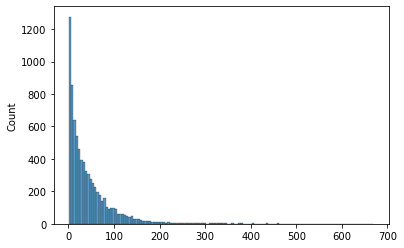

In [54]:
# edit annotations 
id_list = []
gene_list = []
intron_list = []

for current_record in input_df1['Annotation'].to_list():
    fields = current_record.split('_')
    id_list.append(fields[0] + '_' + fields[1])
    gene_list.append(fields[2])
    intron_list.append(fields[3] + '_' + fields[4])
    
input_df1['Id'] = id_list
input_df1['Gene'] = gene_list
input_df1['Intron'] = intron_list

# filtering 
n_records_org = input_df1.shape[0]
n_genes_org = input_df1['Gene'].nunique()

# remove records with same target sequence 
filtered_df1 = input_df1.drop_duplicates(['TargetSequence'])
n_records_removed_same_ts = n_records_org - filtered_df1.shape[0]

# remove records with continuous single nucleotide sequence
sns_drop = ['AAAAA', 'TTTTT', 'GGGGG', 'CCCCC']
filtered_df1 = filtered_df1[~filtered_df1['ReverseComplement'].str.contains('|'.join(sns_drop))]
n_records_removed_csns = n_records_org - n_records_removed_same_ts - filtered_df1.shape[0]

ordered_col = ['Gene', 'Id', 'Intron', 'Annotation',
              'Start', 'End', 'TargetSequence', 'Tm',
               'ReverseComplement', 'Primer', 'Primer Tm', 'Spacer', 'Padlock',
               'Padlock Tm', 'DeltaTm', 'source_index']
filtered_df1 = filtered_df1[ordered_col]
filtered_df1 = filtered_df1.sort_values(by=['Gene', 'Id', 'Intron'])

filtered_df1 = filtered_df1.reset_index(drop = True)
filtered_df1['temp_index'] = filtered_df1.index.astype(str)
filtered_df1['fasta_id'] = filtered_df1[['Annotation', 'temp_index']].apply(lambda x: '_'.join(x), axis=1)
filtered_df1 = filtered_df1.drop('temp_index', 1)

# print log
print(
f'''
Number of records before filtering: {n_records_org}
Number of genes before filtering: {n_genes_org}

Number of records removed due to having same target sequence: {n_records_removed_same_ts}
Number of records removed due to having continuous single nucleotide sequence: {n_records_removed_csns}

Number of records after filtering: {filtered_df1.shape[0]}
Number of genes left after filtering: {filtered_df1['Gene'].nunique()}
''')

# plot distribution 
sns.histplot(filtered_df1['Gene'].value_counts().to_list())

In [55]:
# output files 

def make_seq_record(seq, name):
    seq_record = SeqRecord(Seq(seq), id = name, description = '', letter_annotations = {"phred_quality":[40] * len(seq)})
    return seq_record

seq_records = map(make_seq_record, filtered_df1.TargetSequence, filtered_df1.fasta_id)

# output FASTA
with open(os.path.join(input_path, 'parsed_probes.fa'), 'w') as output_file_fa:   
    Bio.SeqIO.write(seq_records, output_file_fa, 'fasta')

# output FASTQ w/ fake quality score
with open(os.path.join(input_path, 'parsed_probes.fq'), 'w') as output_file_fq:   
    Bio.SeqIO.write(seq_records, output_file_fq, 'fastq')

# output the matrix
filtered_df1.to_csv(os.path.join(input_path, 'filtered_records.csv'))

# output log
with open(os.path.join(input_path, 'log_filtering.txt'), 'w') as output_file:   
    print(
f'''Number of records before filtering: {n_records_org}
Number of genes before filtering: {n_genes_org}

Number of records removed due to having same target sequence: {n_records_removed_same_ts}
Number of records removed due to having continuous single nucleotide sequence: {n_records_removed_csns}

Number of records after filtering: {filtered_df1.shape[0]}
Number of genes left after filtering: {filtered_df1['Gene'].nunique()}
''', file=output_file)

## Filtering based on bbmap (dedupe.sh)

In [33]:
start_time = time.time()

input_path = '/Users/jiahao/Desktop/Broad/Data/Probe/intron_probe/human'
input_dir = os.path.join(input_path, 'clust/')
files = sorted([ f for f in os.listdir(input_dir) if 'cluster' in f ])
files_path = map(lambda x: input_dir + x, files)

table_path = os.path.join(input_path, 'filtered_records.csv')
df = pd.read_csv(table_path, index_col=0)

In [34]:
dup_file = os.path.join(input_path, 'dup.fa')
dup_index = parse_dup(dup_file)

pool = mp.Pool(processes = (mp.cpu_count()))
results = pool.map(parse_cluster, files_path)
pool.close()
pool.join()

merged = list(itertools.chain(*results)) + dup_index

df = df.drop(merged).reset_index(drop = True)

In [35]:
print(f'''After dedupe.sh\nNumber of records remained: {df.shape[0]}
Number of genes left after filtering: {df['Gene'].nunique()}''')

After dedupe.sh
Number of records remained: 332312
Number of genes left after filtering: 7830


<AxesSubplot:ylabel='Count'>

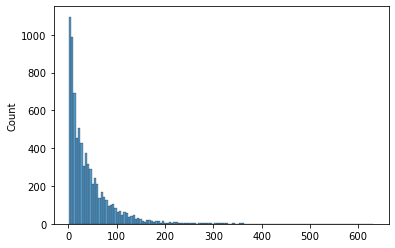

In [36]:
# plot distribution 
sns.histplot(df['Gene'].value_counts().to_list())

In [21]:
# output the matrix
df.to_csv(os.path.join(input_path, 'final_records.csv'))